# grid2healpix examples

grid2healpix.g2h(cmap, bin0bl, spacing, nside)
* cmap: 2D cartesian array where rows correspond to latitude (b) and columns longitude (l), map must have units of /pixel (not /sr)
* bin0bl: (b,l) coordinates of cmap[0,0]
* spacing: distance (in degrees) between adjacent pixels
* nside: nside of output healpix map

**NB:** b is measured in [-90,90] and l in [180,-180], such that (0,0) is the galactic center.

***NBB:*** l is measured such that positive is to the west, negative to the east

In [1]:
# Import relevant modules
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import healpy as hp
import matplotlib
matplotlib.matplotlib_fname()
import matplotlib.pyplot as plt

# Import the grid2healpix function
from grid2healpix import g2h

## Example 1: Simple 50x50 degree box

This example shows the basic syntax, note that the max of the map has changed, which it must as the two maps have different pixel sizes. The sum is much closer however. Note the pixel size varies as a function of latitude.

0 6 2490
0.0 1.20910467756 2490.82884744


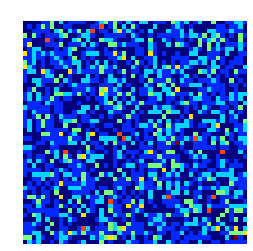

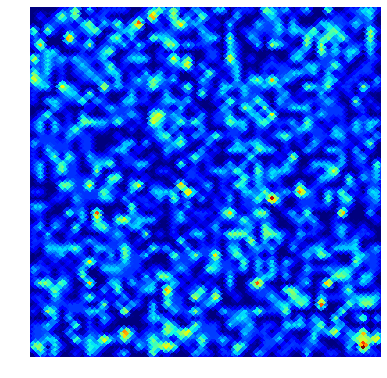

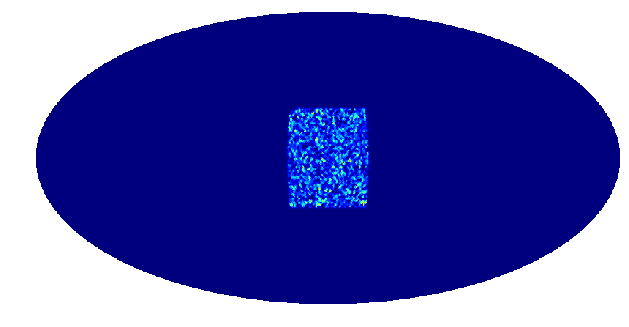

In [2]:
nside=128
randmap = np.random.poisson(1,[50,50])

hmap = g2h(randmap,[-24.5,+24.5],1,nside)

plt.matshow(randmap)
plt.axis('off')
hp.cartview(hmap,lonra=[-25,25],latra=[-25,25],title='',flip='astro',cbar=False)
hp.mollview(hmap,title='',cbar=False)
print np.min(randmap),np.max(randmap),np.sum(randmap)
print np.min(hmap),np.max(hmap),np.sum(hmap)

## Example 2: Map with a similar pixel size in both cases

Here both maps naively have the same pixel size. But we see the max still changes because the pixel locations are different and also the fact the pixels change with latitude.

0 14 12508
0.0 11.1214027986 12464.5654857


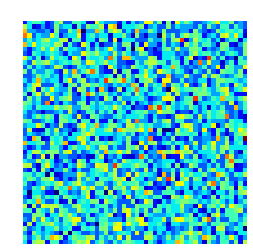

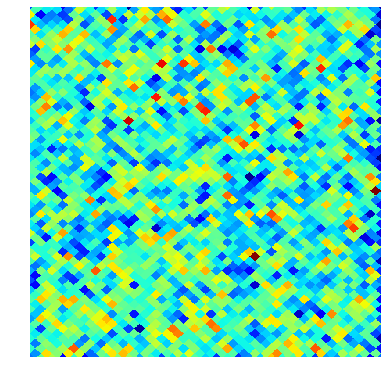

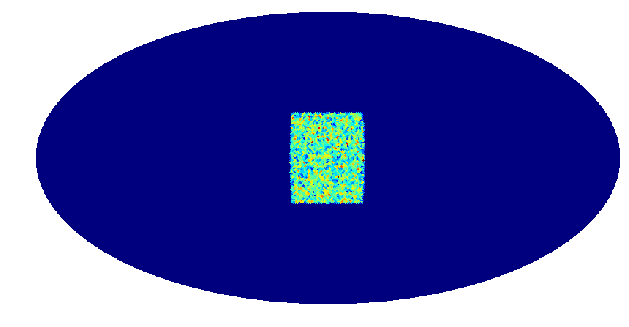

In [3]:
nside=64
pixwidth = np.sqrt(hp.nside2pixarea(nside))*180./np.pi

randmap = np.random.poisson(5,[50,50])

hmap = g2h(randmap,[-24.5*pixwidth,+24.5*pixwidth],pixwidth,nside)

plt.matshow(randmap)
plt.axis('off')
hp.cartview(hmap,lonra=[-24.5*pixwidth,24.5*pixwidth],latra=[-24.5*pixwidth,24.5*pixwidth],title='',flip='astro',cbar=False)
hp.mollview(hmap,title='',cbar=False)
print np.min(randmap),np.max(randmap),np.sum(randmap)
print np.min(hmap),np.max(hmap),np.sum(hmap)

## Example 3: Rectangular Map

Here we include a rectangular map, with dots down the diagonal. This demonstrates the healpix version of the map is faithfully representing the coordinates.

0 20 100719
0.0 28.2838117887 100758.754728


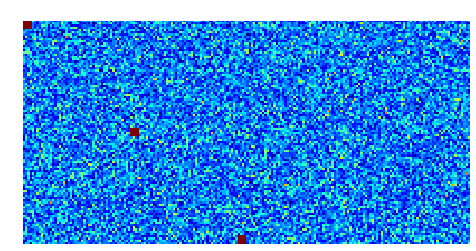

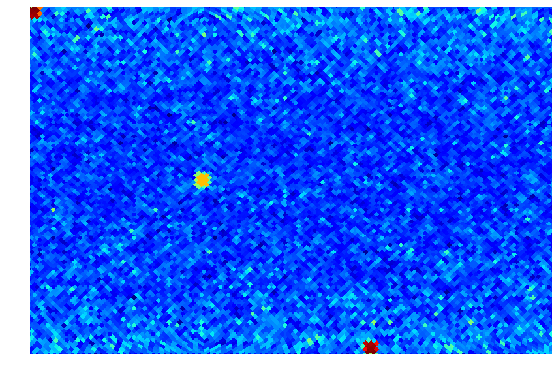

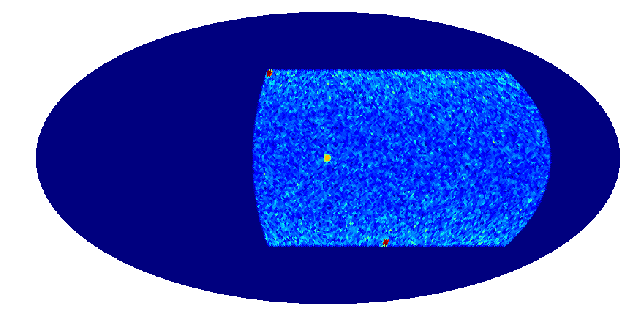

In [4]:
nside=64
pixwidth = np.sqrt(hp.nside2pixarea(nside))*180./np.pi

randmap = np.random.poisson(5,[100,200])

bi = 2
randmap[bi-2:bi+2,bi-2:bi+2] = 20
bi = 50
randmap[bi-2:bi+2,bi-2:bi+2] = 20
bi = 98
randmap[bi-2:bi+2,bi-2:bi+2] = 20


hmap = g2h(randmap,[-49.5*pixwidth,+49.5*pixwidth],pixwidth,nside)

plt.matshow(randmap)
plt.axis('off')
hp.cartview(hmap,lonra=[-2*49.5*pixwidth,49.5*pixwidth],latra=[-49.5*pixwidth,49.5*pixwidth],title='',flip='astro',cbar=False)
hp.mollview(hmap,title='',cbar=False)
print np.min(randmap),np.max(randmap),np.sum(randmap)
print np.min(hmap),np.max(hmap),np.sum(hmap)

## Example 4: Full Sky Map

To make the latitude dependence explicit, we show a cartesian map that varies in intensity on a cartesian grid gets mapped to an isotropic healpix map.

0.0 63.6663425926 140.0
0.0 83.9193142589 232.997408769


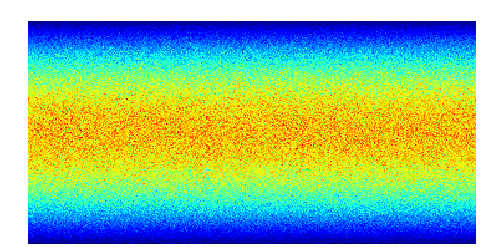

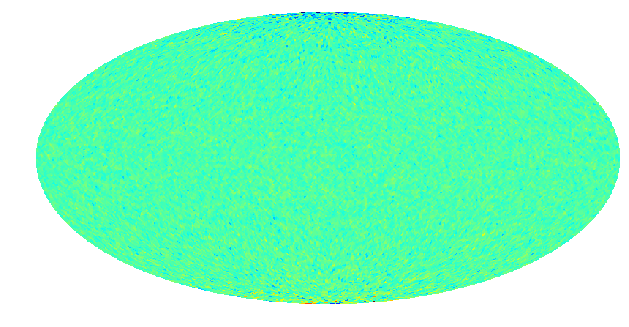

In [5]:
nside=64
randmap = np.zeros(shape=(180,360))
for bi in range(180):
    theta = np.pi/180.*float(bi)
    randmap[bi,:] = np.random.poisson(100*np.sin(theta),360)

np.random.poisson(100,[180,360])

hmap = g2h(randmap,[-89.5,+179.5],1.,nside)

plt.matshow(randmap)
plt.axis('off')
hp.mollview(hmap,title='',cbar=False)
print np.min(randmap),np.mean(randmap),np.max(randmap)
print np.min(hmap),np.mean(hmap),np.max(hmap)